## RNN  
SimpleRNN  

For avoiding the model log, we can use 

    from keras.callbacks import CSVLogger

    csv_logger = CSVLogger('log.csv', append=True, separator=';')
    model.fit(X_train, Y_train, callbacks=[csv_logger])

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from myutils import *

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [3]:
from keras import models, layers
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32,return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


#### Loading data from kears

In [6]:
from keras.datasets import imdb

In [7]:
max_features = 10000
maxlen = 500
batch_size = 32

In [8]:
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=max_features)
print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

(25000,) (25000,) (25000,) (25000,)


In [9]:
train_data[:2]

array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228

In [10]:
word_index = imdb.get_word_index()
print(list(word_index)[:4])

['fawn', 'tsukino', 'nunnery', 'sonja']


#### Padding the data

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

train_label = np.asarray(train_label, dtype='float32')
test_label = np.asarray(test_label, dtype='float32')

#### Building the model

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
hist = model.fit(train_data, train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 945us/step - loss: 0.6447 - acc: 0.6089 - val_loss: 0.4904 - val_acc: 0.7886
Epoch 2/10
20000/20000 [==============================] - 20s 988us/step - loss: 0.4119 - acc: 0.8206 - val_loss: 0.4048 - val_acc: 0.8216
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2981 - acc: 0.8800 - val_loss: 0.3823 - val_acc: 0.8308
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2279 - acc: 0.9128 - val_loss: 0.4195 - val_acc: 0.8150
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1562 - acc: 0.9448 - val_loss: 0.4331 - val_acc: 0.8388
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1020 - acc: 0.9660 - val_loss: 0.4509 - val_acc: 0.8554
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0671 - acc: 0.9794 - val_loss: 0.4910 - val_

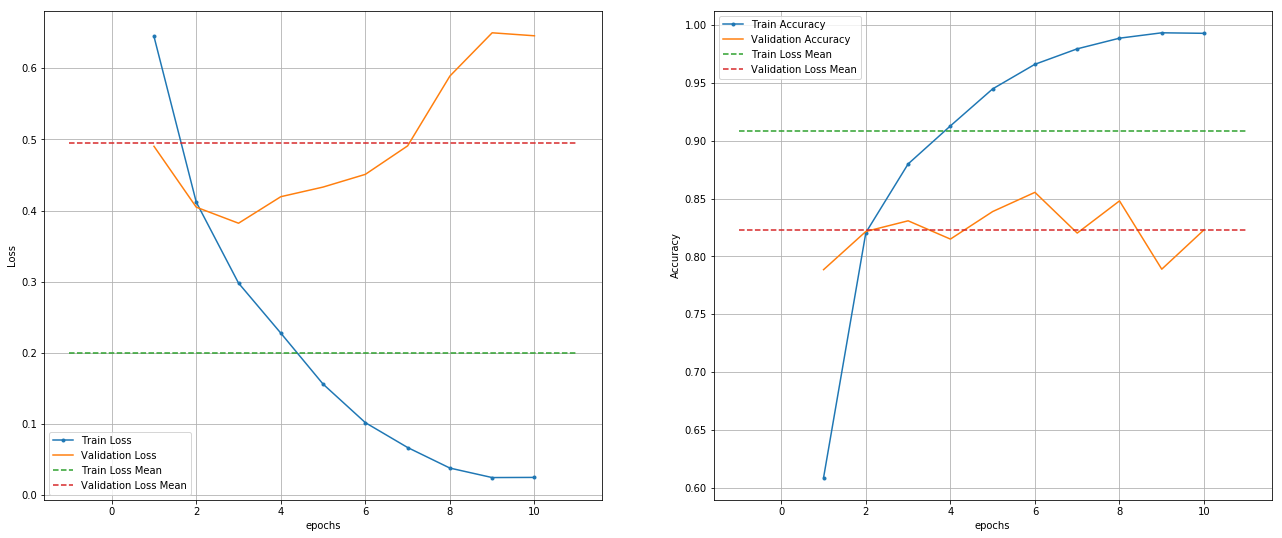

In [17]:
plot_keras_acc_ax(hist)

## RNN - LSTM

In [18]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
hist_LSTM = model.fit(train_data, train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.5019 - acc: 0.7601 - val_loss: 0.4708 - val_acc: 0.7922
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2910 - acc: 0.8864 - val_loss: 0.2860 - val_acc: 0.8832
Epoch 3/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2403 - acc: 0.9080 - val_loss: 0.2932 - val_acc: 0.8764
Epoch 4/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1963 - acc: 0.9274 - val_loss: 0.3366 - val_acc: 0.8832
Epoch 5/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1718 - acc: 0.9373 - val_loss: 0.3821 - val_acc: 0.8322
Epoch 6/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1551 - acc: 0.9440 - val_loss: 0.4807 - val_acc: 0.8196
Epoch 7/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1470 - acc: 0.9481 - val_loss: 0.3077 - val_acc:

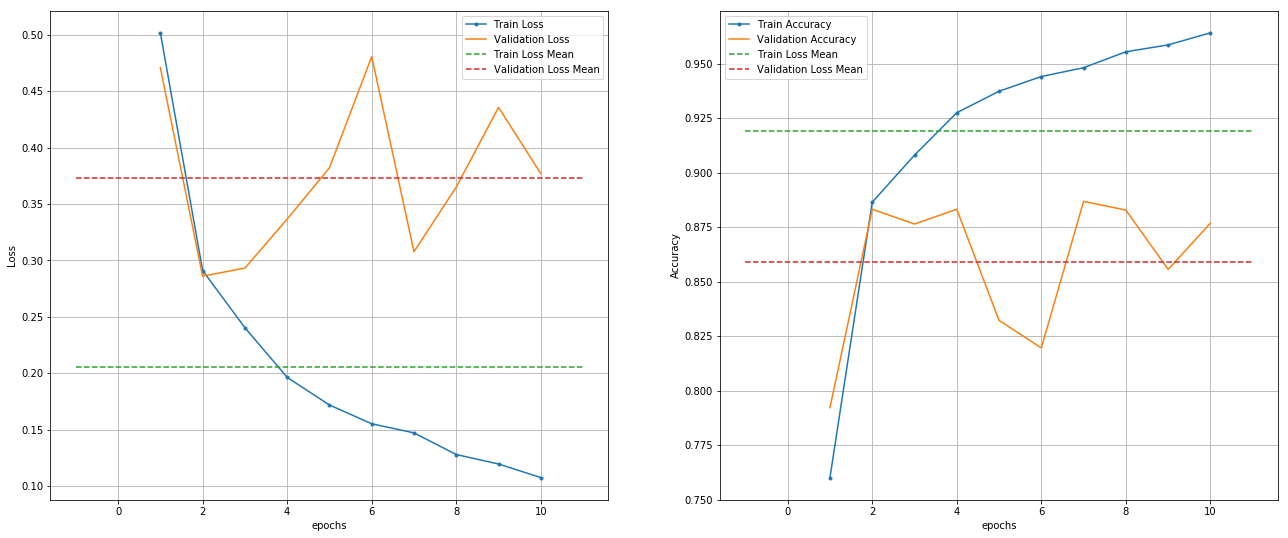

In [21]:
plot_keras_acc_ax(hist_LSTM)